Minimize
20 10
2 0 100 leq
2 0 60 leq
2 0 40 leq
Unbounded Feasible region
Extreme Point: (20.0,0.0) Value: 400.0
Extreme Point: (0.0,0.0) Value: 0.0


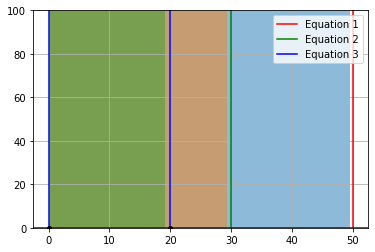

Unique Minimum solution
Minimum Solution:x = 0.0 , y = 0.0, value = 0.0


In [7]:
import pulp as p
import numpy as np
import matplotlib.pyplot as plt

# DISCLAIMER : An upper y-limit and x-limit of 100 has been set to improve visibility.
# For LPP problems having feasible region or points with y>100 , visibility on graph
# may be hindered.  
# Input values as shown in the question
# To check overlapping region follow the progressively darker regions on the graph (color gradient)
# Extreme points have been highlighted with black markers
def eqn(a,b,c,x):
    return (float(c)-float(a)*x)/float(b)
def eqn1(a,b,c,x):
    return np.linspace(0,100,x.size)
def val(a,a1,b,b1):
    return (float(a)*float(a1)+float(b)*float(b1))


#code to solve lpp via pulp library
#input for problem type: Minimize/Maximize
type_prob=input()
check=[]
check1=[]
constr=[[0 for i in range(3)]for j in range(3)]    #2d array to kep track of coefficients
type_1=["" for i in range(3)]   #1d array to store geq or leq

#check type of problem
#prob_check is present to check unbounded region in case of an optimal solution
if(type_prob=="Minimize"):
    prob=p.LpProblem('Problem',p.LpMinimize)
    str1="Minimum"
    prob_check=p.LpProblem('Problem',p.LpMaximize)    
else:
    prob=p.LpProblem('Problem',p.LpMaximize)
    prob_check=p.LpProblem('Problem',p.LpMinimize)
    str1="Maximum"

# lower bound of x and y set     
x=p.LpVariable("x",lowBound=0)
y=p.LpVariable("y",lowBound=0)
x1=p.LpVariable("x1",lowBound=0)
y1=p.LpVariable("y1",lowBound=0)

#input for objective function
a1,a2=input().split(" ")
prob+=int(a1)*x+int(a2)*y
prob_check+=int(a1)*x1+int(a2)*y1

#input for constaints (3)
for i in range(3):
    i1,i2,i3,i4=input().split(' ')
    if(i4=='geq'):
        check.append(int(i1)*x+int(i2)*y>=int(i3))
        check1.append(int(i1)*x1+int(i2)*y1>=int(i3))
    if(i4=='leq'):
        check.append(int(i1)*x+int(i2)*y<=int(i3))
        check1.append(int(i1)*x1+int(i2)*y1<=int(i3))
    constr[i][0]=float(i1)
    constr[i][1]=float(i2)
    constr[i][2]=float(i3)
    type_1[i]=i4

# add constraints to the problem 

for i in check:
    prob+=i
for i in check1:
    prob_check+=i
status = prob.solve()
status_check = prob_check.solve()

#check type of region via status codes
#if solution is optimal
if(status==1):
    if(status_check==1):
        print("Bounded feasible region")
    else:
        print("Unbounded Feasible region")
         
#if solution is infeasible
elif(status==-1):
    print("Infeasible region")    #print("No solution")
    
#if solution is unbounded ,i.e. objective function is at either of the infinities
elif(status==-2):
    print("Unbounded region")    #print("Objective function is infinity")

#implementation of graphical anlysis and extreme points
# pairwise equations are solved to check for extreme points . For parallel lines -1 is put as 
# a default value.

ans_x=np.ones(10)
ans_y=np.ones(10)

# to solve eqn 1 and 2
mat_1=np.array([[float(constr[0][0]),float(constr[0][1])],[
                                              float(constr[1][0]),float(constr[1][1])]])
if(np.linalg.det(mat_1)==0):
    ans_x[0]=-1
    ans_y[0]=-1
else:
    [ans_x[0],ans_y[0]]=np.linalg.solve(mat_1,np.array([float(constr[0][2]),float(constr[1][2])]))

# to solve eqn 2 and 3
mat_2=np.array([[float(constr[2][0]),float(constr[2][1])],
                    [float(constr[1][0]),float(constr[1][1])]])
if(np.linalg.det(mat_2)==0):
    ans_x[1]=-1
    ans_y[1]=-1
else:
    [ans_x[1],ans_y[1]]=np.linalg.solve(mat_2,np.array([constr[2][2],constr[1][2]]))

# to solve eqn 1 and 3
mat_3=np.array([[constr[0][0],constr[0][1]],[constr[2][0],constr[2][1]]])
if(np.linalg.det(mat_3)==0):
    ans_x[2]=-1
    ans_y[2]=-1
else:
    [ans_x[2],ans_y[2]]=np.linalg.solve(mat_3,np.array([constr[0][2],constr[2][2]]))

#to solve intersection of eqn 1 and y-axis
mat_4=np.array([[constr[0][0],constr[0][1]],[1,0]])
if(np.linalg.det(mat_4)==0):
    ans_x[3]=-1
    ans_y[3]=-1
else:
    [ans_x[3],ans_y[3]]=np.linalg.solve(mat_4,np.array([constr[0][2],0]))

#to solve intersection of eqn 2 and y-axis
mat_5=np.array([[constr[1][0],constr[1][1]],[1,0]])
if(np.linalg.det(mat_5)==0):
    ans_x[4]=-1
    ans_y[4]=-1
else:
    [ans_x[4],ans_y[4]]=np.linalg.solve(mat_5,np.array([constr[1][2],0]))
                                                
#to solve intersection of eqn 3 and y-axis
mat_6=np.array([[constr[2][0],constr[2][1]],[1,0]])
if(np.linalg.det(mat_6)==0):
    ans_x[5]=-1
    ans_y[5]=-1
else:
    [ans_x[5],ans_y[5]]=np.linalg.solve(mat_6,np.array([constr[2][2],0]))
                                                
#to solve intersection of eqn 1 and x-axis
mat_7=np.array([[constr[0][0],constr[0][1]],[0,1]])
if(np.linalg.det(mat_7)==0):
    ans_x[6]=-1
    ans_y[6]=-1
else:
    [ans_x[6],ans_y[6]]=np.linalg.solve(mat_7,np.array([constr[0][2],0]))
                                                
#to solve intersection of eqn 2 and x-axis
mat_8=np.array([[constr[1][0],constr[1][1]],[0,1]])
if(np.linalg.det(mat_8)==0):
    ans_x[7]=-1
    ans_y[7]=-1
else:
    [ans_x[7],ans_y[7]]=np.linalg.solve(mat_8,np.array([constr[1][2],0]))
                                                
#to solve intersection of eqn 3 and x-axis
mat_9=np.array([[constr[2][0],constr[2][1]],[0,1]])
if(np.linalg.det(mat_9)==0):
    ans_x[8]=-1
    ans_y[8]=-1
else:
    [ans_x[8],ans_y[8]]=np.linalg.solve(mat_9,np.array([constr[2][2],0]))
                                                
ans_x[9]=0
ans_y[9]=0

x_axis=np.linspace(0,100,100)
if(constr[0][1]!=0):
    y_1=eqn(constr[0][0],constr[0][1],constr[0][2], x_axis)
    plt.plot(x_axis,y_1,color='r',label='Equation 1')
else:
    y_1=eqn1(constr[0][0],constr[0][1],constr[0][2], x_axis)
    x_axis1=np.linspace(constr[0][2]/constr[0][0],constr[0][2]/constr[0][0],x_axis.size)
    plt.plot(x_axis1,y_1,color='r',label='Equation 1')
if(constr[1][1]!=0):
    y_2=eqn(constr[1][0],constr[1][1],constr[1][2], x_axis)
    plt.plot(x_axis,y_2,color='g',label='Equation 2')
else:
    y_2=eqn1(constr[1][0],constr[1][1],constr[1][2], x_axis)
    x_axis2=np.linspace(constr[1][2]/constr[1][0],constr[1][2]/constr[1][0],x_axis.size)
    plt.plot(x_axis2,y_2,color='g',label='Equation 2')
if(constr[2][1]!=0):    
    y_3=eqn(constr[2][0],constr[2][1],constr[2][2], x_axis)
    plt.plot(x_axis,y_3,color='b',label='Equation 3')
else:
    y_3=eqn1(constr[2][0],constr[2][1],constr[2][2], x_axis)
    x_axis3=np.linspace(constr[2][2]/constr[2][0],constr[2][2]/constr[2][0],x_axis.size)
    plt.plot(x_axis3,y_3,color='b',label='Equation 3')

plt.axvline(0,color='b')
plt.axhline(0,color='b')
plt.legend(loc="upper right")
max_y=max(ans_x[3],ans_x[4],ans_x[5])
if(type_1[0]=="leq"):
    t1=0
    if(constr[0][1]!=0):
        plt.fill_between(x_axis,t1,y_1,alpha=0.5)
    else:
        plt.fill_between(x_axis,100,0,alpha=0.5,where= x_axis<=constr[0][2]/constr[0][0])
elif(type_1[0]=="geq"):
    t1=100
    if(constr[0][1]!=0):
        plt.fill_between(x_axis,t1,y_1,alpha=0.5)
    else:
        plt.fill_between(x_axis,t1,0,alpha=0.5,where = x_axis>=constr[0][2]/constr[0][0])
if(type_1[1]=="leq"):
    t2=0
    if(constr[1][1]!=0):
        plt.fill_between(x_axis,t2,y_2,alpha=0.5)
    else:
        plt.fill_between(x_axis,100,0,alpha=0.5,where= x_axis<=constr[1][2]/constr[1][0])
elif(type_1[1]=="geq"):
    t2=100
    if(constr[1][1]!=0):
        plt.fill_between(x_axis,t2,y_2,alpha=0.5)
    else:
        plt.fill_between(x_axis,t2,0,alpha=0.5,where = x_axis>=constr[1][2]/constr[1][0])
if(type_1[2]=="leq"):
    t3=0
    if(constr[2][1]!=0):
        plt.fill_between(x_axis,t3,y_3,alpha=0.5)
    else:
        plt.fill_between(x_axis,100,0,alpha=0.5,where= x_axis<=constr[2][2]/constr[2][0])
elif(type_1[2]=="geq"):
    t3=100
    if(constr[2][1]!=0):
        plt.fill_between(x_axis,t3,y_3,alpha=0.5)
    else:
        plt.fill_between(x_axis,100,0,alpha=0.5,where = x_axis>=constr[2][2]/constr[2][0])

## check if extreme points lie in feasible region

for i in range(10):
    val1=val(ans_x[i],constr[0][0],ans_y[i],constr[0][1])
    val2=val(ans_x[i],constr[1][0],ans_y[i],constr[1][1])
    val3=val(ans_x[i],constr[2][0],ans_y[i],constr[2][1])
    final_val=val(ans_x[i],a1,ans_y[i],a2)
    
    if(ans_x[i]<0 or ans_y[i]<0):
        continue
    if((type_1[0]=="geq" and val1 < constr[0][2]) or (type_1[0]=="leq" and val1 > constr[0][2])
                                                  or (type_1[0]=="eq" and val1 != constr[0][2])):
        continue
    if((type_1[1]=="geq" and val2 < constr[1][2]) or (type_1[1]=="leq" and val1 > constr[1][2])
                                                  or (type_1[1]=="eq" and val1 != constr[1][2])):
        continue
    if((type_1[2]=="geq" and val3 < constr[2][2]) or (type_1[2]=="leq" and val1 > constr[2][2])
                                                  or (type_1[2]=="eq" and val1 != constr[2][2])):
        continue
    
    plt.plot(ans_x[i],ans_y[i], marker='o', markersize=4, color="black")
    print("Extreme Point: (" + str(ans_x[i])+","+str(ans_y[i])+") Value: "+str(final_val))
    
# Upper y-limit of 100 to improve feasibility.  
plt.ylim(0,100)
plt.grid()
plt.show()

##

#check type of solution via status codes
#if solution is optimal
if(status==1):
    print("Unique "+str1+" solution")
    print(str1+" Solution:"+"x = "+str(p.value(x))+" , y = "+str(p.value(y))+", value = "+str(p.value(prob.objective)))
    
        
#if solution is infeasible
elif(status==-1):
    print("No solution")
    
#if solution is unbounded ,i.e. objective function is at either of the infinities
elif(status==-2):
    print("Objective function is infinity. X or Y or both is/are at +- inf")
        
